### Necessary Imports

In [1]:
import pandas as pd
import numpy as np

#imports from extract function words 
import os
import os.path
import re
import string
import collections
import math
from collections import Counter
import random

# plotting 
import seaborn as sns
from matplotlib import pyplot as plt

### Sklearn Imports

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Data Loading

In [3]:
frequentwords = ['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for', 'from', 'had', 'has', 'have', 'her', 'his', 'if', 'in', 'into', 'is', 'it', 'its', 'may', 'more', 'must', 'my', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'shall', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'then', 'there', 'things', 'this', 'to', 'up', 'upon', 'was', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'your']

path = '../data/Raw/blogs/blogs/'
files = os.listdir(path)
files.sort() 

df = pd.read_csv('../data/Processed/dataframe_2.csv')
df = df.sort_values('total_words', ascending = False)

### Get Train Test function

In [4]:
def get_train_test_sample(df,train_n,test_n,take):
    target = train_n+test_n
    temp = df[df['total_words'] >= target].head(take)
    train_vecs = [] 
    test_vecs = [] 
    ids = []
    for i in temp.iterrows():
        words = i[1][-1] - i[1][-2]
 
        random_words =random.sample([i for i in range(0,words)],train_n)

        trvec = [] 
        prev_len = 0
        for x in i[1].index:
            if np.isin(x,frequentwords) == True:
                size = i[1][x]
                count = [i for i in random_words if prev_len <= i < prev_len + size ]
                prev_len = size
                trvec.append(len(count))

        random_words = random.sample(list(range(0,words)),test_n)

        tevec = [] 
        prev_len = 0
        for x in i[1].index:
            if np.isin(x,frequentwords) == True:
                size = i[1][x]
                count = [i for i in random_words if prev_len <= i < prev_len + size ]
                prev_len = size
                tevec.append(len(count))

        ids.append(i[1][0])
        test_vecs.append(tevec)
        train_vecs.append(trvec)
    return([ids,test_vecs,train_vecs])

## Varying train test split

In [5]:
trains = []
tests = []
ys = []
test_size = [1000,2000,3000,4000,5000]
for i in test_size:
    print(i)
    ids,test,train = get_train_test_sample(df,5000,i,100)
    X_test = pd.DataFrame(test)
    X_train = pd.DataFrame(train)
    y = ids

    trains.append(X_train)
    tests.append(X_test)
    ys.append(y)

1000
2000
3000
4000
5000


In [6]:
rf_predictions = []
knn_predictions = []
net_predictions = []
log_predictions = []
svc_predictions = [] 
no_scaler_rf = [] 
no_scaler_knn = [] 

In [7]:
for j in range (0,len(trains)):
    print(i)
    X_train = trains[j]
    X_test = tests[j]
    y = ys[j]

    tree_model =  RandomForestClassifier(n_estimators = 500)
    tree_model.fit(X_train,y)
    t_predictions = tree_model.predict(X_test)
    no_scaler_rf.append(sum(np.where(y-t_predictions == 0,1,0))/len(t_predictions))

    tree_model =  KNeighborsClassifier(n_neighbors=1)
    tree_model.fit(X_train,y)
    t_predictions = tree_model.predict(X_test)
    no_scaler_knn.append(sum(np.where(y-t_predictions == 0,1,0))/len(t_predictions))

    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    tree_model =  RandomForestClassifier(n_estimators = 500)
    knn_model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 1)
    net_model = MLPClassifier(solver='adam', alpha=0.001,hidden_layer_sizes=(100, 70),activation = 'logistic',max_iter = 1000)
    log_model = LogisticRegression(solver = 'saga',penalty = 'l1',max_iter = 1000)
    svc_model = SVC()

    tree_model.fit(X_train,y)
    t_predictions = tree_model.predict(X_test)
    rf_predictions.append(sum(np.where(y-t_predictions == 0,1,0))/len(t_predictions))

    knn_model.fit(X_train,y)
    k_predictions = knn_model.predict(X_test)
    knn_predictions.append(sum(np.where(y-k_predictions == 0,1,0))/len(k_predictions))

    net_model.fit(X_train,y)
    n_predictions = net_model.predict(X_test)
    net_predictions.append(sum(np.where(y-n_predictions == 0,1,0))/len(n_predictions))

    log_model.fit(X_train,y)
    l_predictions = log_model.predict(X_test)
    log_predictions.append(sum(np.where(y-l_predictions == 0,1,0))/len(l_predictions))

    svc_model.fit(X_train,y)
    l_predictions = log_model.predict(X_test)
    svc_predictions.append(sum(np.where(y-l_predictions == 0,1,0))/len(l_predictions))

5000


C:\Users\jonah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5000


C:\Users\jonah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5000


C:\Users\jonah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5000


C:\Users\jonah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5000


C:\Users\jonah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [8]:
splits = test_size

df1 = (pd.DataFrame({'value': rf_predictions,'split':splits,'Model': 'RF'}))
df1b = (pd.DataFrame({'value': no_scaler_rf,'split':splits,'Model': 'RF (no scaler)'}))

df2 = (pd.DataFrame({'value': knn_predictions,'split':splits,'Model': 'KNN'}))
df2b = (pd.DataFrame({'value': no_scaler_knn,'split':splits,'Model': 'KNN (no scaler)'}))

df3 = (pd.DataFrame({'value': net_predictions,'split':splits,'Model': 'Neural Net'}))
df4 = (pd.DataFrame({'value': log_predictions,'split':splits,'Model': 'Multinomial Regression'}))

df5 = (pd.DataFrame({'value': svc_predictions,'split':splits,'Model': 'SVM'}))

### Comparing Course Models

Text(28.467916666666667, 0.5, 'Accuracy')

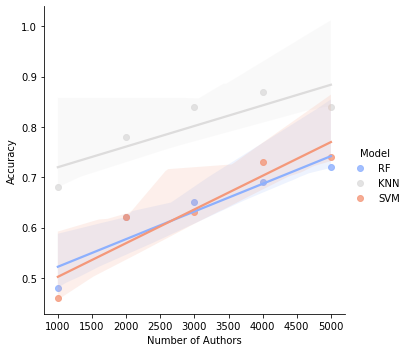

In [9]:
df_plot = pd.concat([df1,df2,df5])
sns.lmplot(data = df_plot,x='split',y='value',hue='Model', palette='coolwarm')
plt.xlabel('Number of Authors')
plt.ylabel('Accuracy')

### Comparing Net, Multinomial vs KNN 

Text(41.01541666666667, 0.5, 'Accuracy')

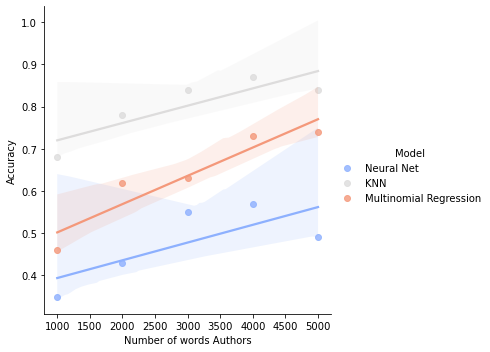

In [10]:
df_plot = pd.concat([df3,df2,df4])
sns.lmplot(data = df_plot,x='split',y='value',hue='Model', palette='coolwarm')
plt.xlabel('Number of words Authors')
plt.ylabel('Accuracy')

### Average Accuracy Metrics

In [11]:
df_avg = pd.concat([df1,df1b,df2,df3,df4,df5])

df_avg.groupby(['Model']).mean().sort_values('value')


,value,split
Model,,
RF (no scaler),0.258,3000.0
Neural Net,0.478,3000.0
RF,0.632,3000.0
Multinomial Regression,0.636,3000.0
SVM,0.636,3000.0
KNN,0.802,3000.0


### Avg accuracy [80,90,100]

In [15]:
df_avg.groupby('Model').head(1).groupby('Model').mean()

,value,split
Model,,
KNN,0.68,1000.0
Multinomial Regression,0.46,1000.0
Neural Net,0.35,1000.0
RF,0.48,1000.0
RF (no scaler),0.02,1000.0
SVM,0.46,1000.0


### accuracy metrics: avg authors [10,20,30]

In [14]:
df_avg.groupby('Model').tail(1).groupby('Model').mean()

,value,split
Model,,
KNN,0.84,5000.0
Multinomial Regression,0.74,5000.0
Neural Net,0.49,5000.0
RF,0.72,5000.0
RF (no scaler),0.71,5000.0
SVM,0.74,5000.0
